In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
#fromm sklearn import 
#from sklearn.decomposition import PCA

# 1. Read the file and display columns.

In [2]:
# Reading csv with pandas and creating dafaframe
df = pd.read_csv("cruise_ship_info.csv")

In [3]:
# First imppressions of dataframe
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


# 2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.

In [4]:
# Printing more details of numeric values. Understanding lower and top numbers
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


* ## First assumption is that all features but Age and Tonnage are expressed in a /100 proportion. Meaning that for example max crew size is 21*100 = 2100 and min crew size is 0.59*100 = 59.
* ## Second observation is that all values are expressed in different ranges due to the nature of what represent (years, pounts, feet, proportions, and quantity numbers)

# 3. Select columns that will be probably important to predict “crew” size.

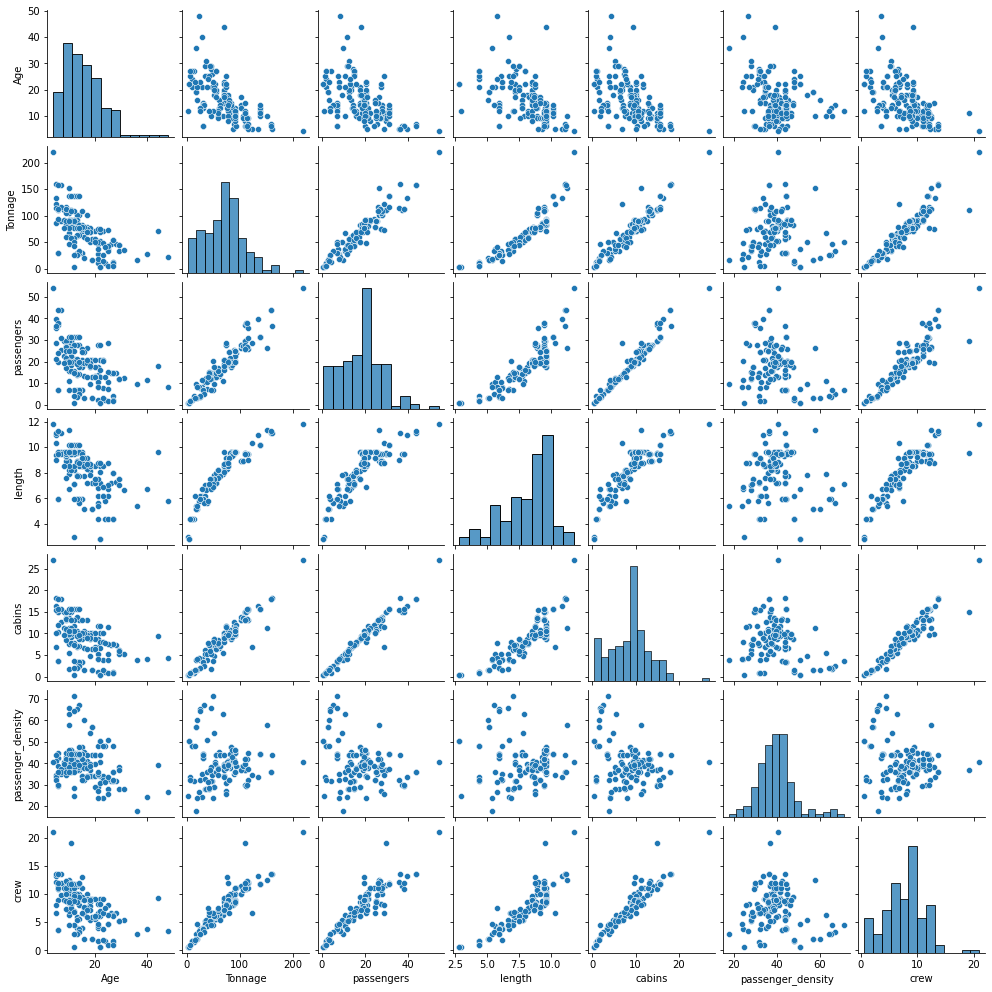

In [5]:
# Plotting a pariplot with seaborn to analize correlation between features and its distributions.
sns.pairplot(df, height=2.0);

# 4. If you removed columns explain why you removed those.
## Will be deleting Age and passenger density because both do not correlate

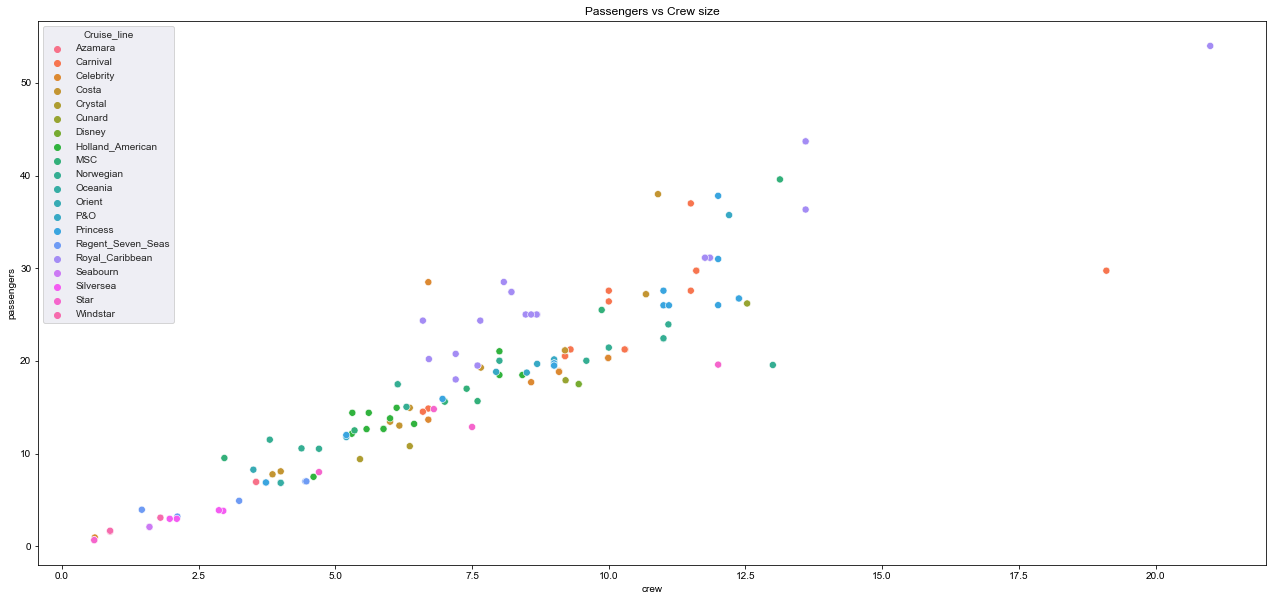

In [6]:
# Plotting a scatterplot to see the relation between crew and passengers
plt.figure(figsize=(22, 10))
plt.title('Passengers vs Crew size')
#plt.style.context('fivethirtyeight')
sns.set_style('darkgrid')
sns.scatterplot(data = df, x= 'crew', y= 'passengers', hue='Cruise_line', s=50);

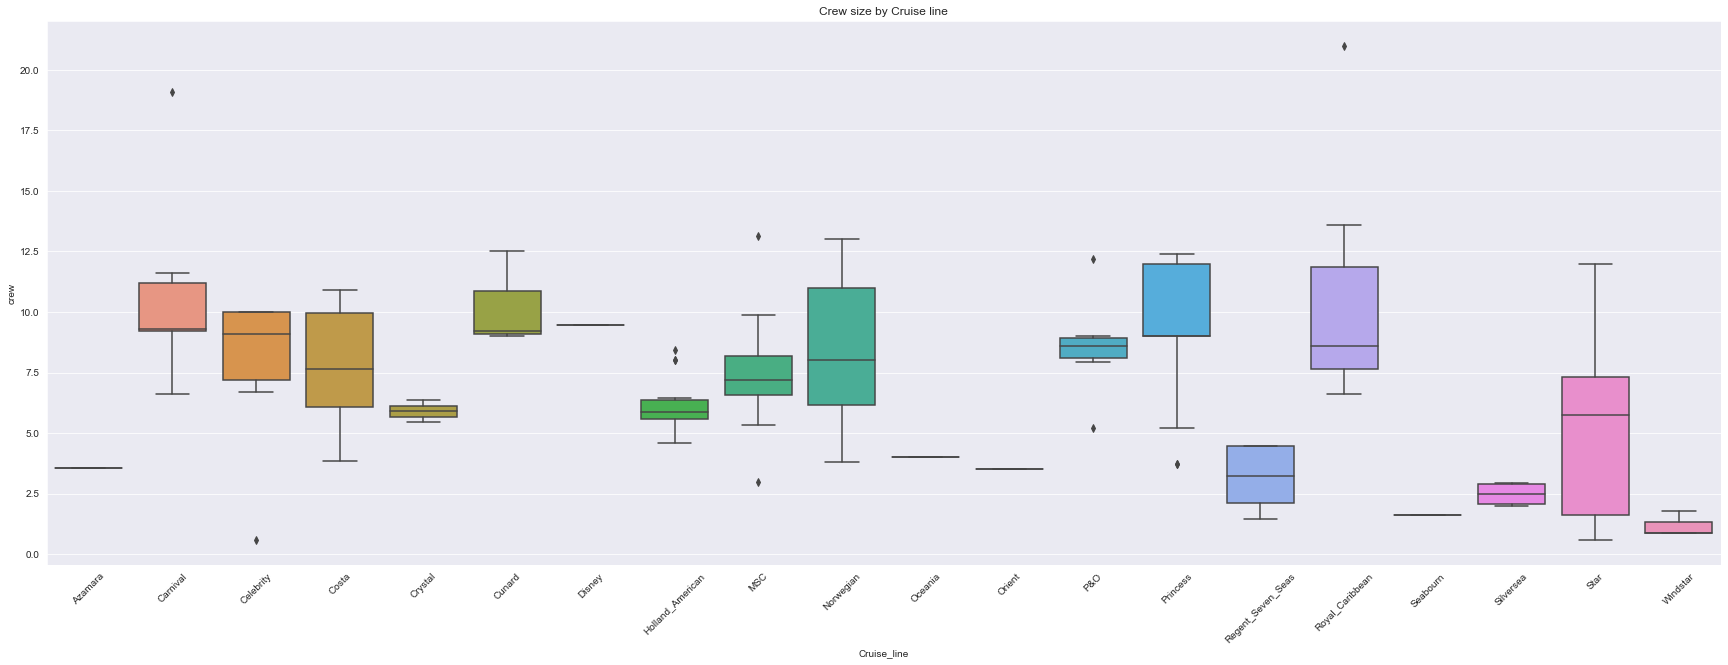

In [7]:
# Plotting a boxplot to check how values vary between features (its max and min values, median, outliers)
plt.figure(figsize=(30, 10))
sns.set_style('darkgrid')
plt.title('Crew size by Cruise line')
plt.xticks(rotation = 45)
sns.boxplot(data = df, x= 'Cruise_line', y= 'crew');

In [8]:
# Numeric & categorical columns identification. Dropping columns that won't help infer the crew size.
num_cols = ['Tonnage', 'passengers', 'length', 'cabins']
cat_cols = ['Ship_name', 'Cruise_line']
df = df[df.crew<15]
df = df[df.crew>2]
df.drop(columns=['Age', 'passenger_density'], inplace=True) # Keeping only correlated columns
# Getting rid of outliers
df.head()

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,crew
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00
5,Ecstasy,Carnival,70.367,20.52,8.55,10.20,9.20


# 5. Use one-hot encoding for categorical features.

# One Hot Encoding

In [9]:
# Instanciating the encoder
ohe = OneHotEncoder()

In [10]:
# Training and encoding the selected categorical features
ohehotlabels = ohe.fit_transform(df.iloc[:,0:2]).toarray()
print('Array: \n', ohehotlabels)
print('\n''Shape:', df.shape)

Array: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]

Shape: (145, 7)


In [11]:
# Encoding of categorical features, datatype output: int
bool_df = pd.DataFrame(ohehotlabels, dtype='int')
bool_df.columns = list(ohe.get_feature_names(['Ship', 'Cruise']))

In [12]:
# Merging it all into a new dataframe
final_df = pd.DataFrame(df).join(bool_df, how='inner')
final_df.columns.values[:4] = df.columns.values[0:4]
final_df.drop(columns=['Ship_name', 'Cruise_line'], inplace=True)
final_df.head()

,Tonnage,passengers,length,cabins,crew,Ship_Adventure,Ship_Allegra,Ship_Amsterdam,Ship_Arcadia,Ship_Armonia,...,Cruise_MSC,Cruise_Norwegian,Cruise_Oceania,Cruise_Orient,Cruise_P&O,Cruise_Princess,Cruise_Regent_Seven_Seas,Cruise_Royal_Caribbean,Cruise_Silversea,Cruise_Star
0,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.262,14.86,7.22,7.43,6.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101.353,26.42,8.92,13.21,10.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,70.367,20.52,8.55,10.20,9.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Separating target feature from the rest of the dataset
y = final_df.crew
X = final_df.drop(columns='crew')

# 6. Create training and testing sets (use 60% of the data for the training and reminder for testing).

# Train & Test set splitting

In [14]:
#y = y.values
# 60% train size, random state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=100)

# 7. Build a machine learning model to predict the ‘crew’ size.

# Linear Machine Learning model

In [15]:
# Stablishing features in a list
features = ['Tonnage', 'passengers', 'lenght', 'cabins']

In [16]:
# Instanciating the Linear Regression model (SKlearn)
ln = LinearRegression(fit_intercept=True, n_jobs=-1)

## 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
* ### No hyper parameters in this model

In [17]:
# Model fitting and predictions over train and test sets
ln.fit(X_train, y_train)
y_train_pred = ln.predict(X_train)
y_test_pred = ln.predict(X_test)

In [18]:
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R2 Score: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE: 1.162
R2 Score: 0.841
MAE: 0.722


# Analyzing  some predictions manually

In [34]:
# Preparing indexing taking in consideration test set indexing and original df indexing
def indexing(y_test, y_test_pred):
    global ship_selection
    global y_test_dif
    ship_test_index = list(y_test.index)
    ship_selection = pd.DataFrame(ship_test_index, index=range(1,len(ship_test_index)+1))
    ship_selection.columns = ['old_ship_index']
    y_test_dif = pd.Series(y_test_pred-y_test)*100 # Estimating difference between predicted and real values
    return y_test_dif

In [35]:
# Function for User testing
def manual_predict(y_test, y_test_pred):
    indexing(y_test, y_test_pred)
    ship_index = int(input("You are about to select a ship from the test set. Please choose a number from 1 to {}. You'll just loose time inserting other values".format(len(ship_selection))))-1
    print("You've selected", df.Ship_name.loc[ship_selection.iloc[ship_index].old_ship_index], 'of', df.Cruise_line.loc[ship_selection.iloc[ship_index].old_ship_index], 'Cruises')
    print('Real crew size of the ship is', int(round(y_test.iloc[ship_index]*100,2)))
    print('Predicted value is:', int(round(y_test_pred[ship_index]*100,2)), '( Santard Deviation of results:', round(y_test_dif.std()),').')

In [36]:
manual_predict(y_test, y_test_pred)

You've selected Serenity of Crystal Cruises
Real crew size of the ship is 636
Predicted value is: 648 ( Santard Deviation of results: 108 ).


# SVM Model

In [37]:
regr = svm.SVR(kernel='linear', C=0.3)
regr.fit(X_train, y_train)

SVR(C=0.3, kernel='linear')

## 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
* ### linear kernel because of linear relationship between variables
* ### low value for C in order to lower error

In [38]:
y_pred = regr.predict(X_test)

In [39]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 0.7907912629180004
R2 Score: 0.8918795983222945
MAE: 0.5751893903957436


In [40]:
indexing(y_test, y_pred)
manual_predict(y_test, y_pred)

You've selected Serenity of Crystal Cruises
Real crew size of the ship is 636
Predicted value is: 633 ( Santard Deviation of results: 89 ).


# Bayesian Regression Model

## 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
* ### No hyperparameters for this model

In [41]:
brm = BayesianRidge()
brm.fit(X_train, y_train)

BayesianRidge()

In [42]:
y_pred = brm.predict(X_test)

In [43]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 0.8292738750751747
R2 Score: 0.8866180891489533
MAE: 0.5812881099757065


# Random Forest Regressor Model

In [44]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

## 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
* ### I haven't configured any hyper-params in this model
* ### I would try grid search or random grid to get the best hyper-parameters

In [45]:
y_pred = rfr.predict(X_test)

In [46]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 0.9809674667857173
R2 Score: 0.8658778852079566
MAE: 0.6242107142857147


# 8. Calculate the Pearson correlation coefficient for the training set and testing data sets.

In [47]:
# Standarized values for Pearson correlation graph
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X.iloc[:,:4])

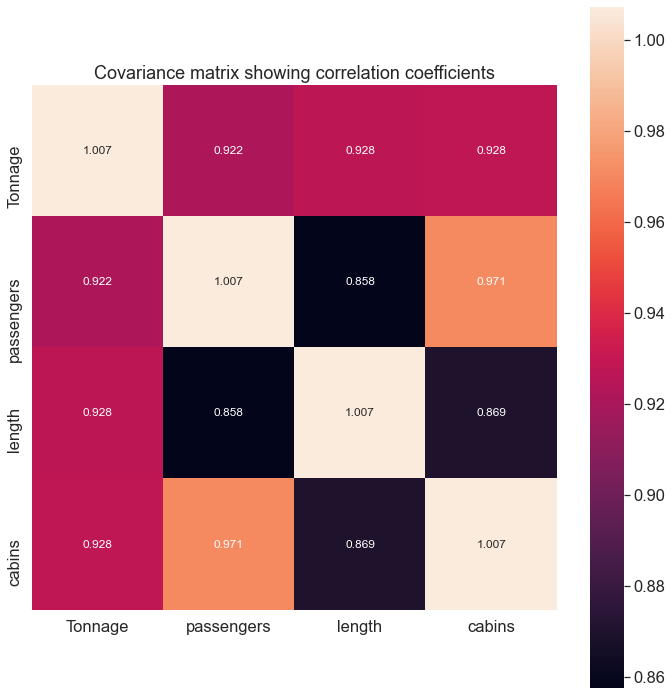

In [48]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.3f',
                 annot_kws={'size': 12},
                 yticklabels=num_cols,
                 xticklabels=num_cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

# 10.What is regularization? What is the regularization parameter in your model?

- ## Regularization is used to decrease the model complexity in order to avoid the risk of overfitting
- ## It works by lowering the coefficient estimates
- ## In the SVM model I decreased the value of C (default was 1) to 0.3 risking the model to overfit, gaining a better R2 score and lowering MSE

# 11.Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has bias problem or variance problem.

## [TDS - Bias-Variance Tradeoff](https://towardsdatascience.com/regularization-the-path-to-bias-variance-trade-off-b7a7088b4577)